In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)

# Data Analysis

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
if df.isna().sum().sum() > 0:
    print('There are missing values in the dataset')
else:
    print('There are no missing values in the dataset')


There are no missing values in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [7]:
df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('category')

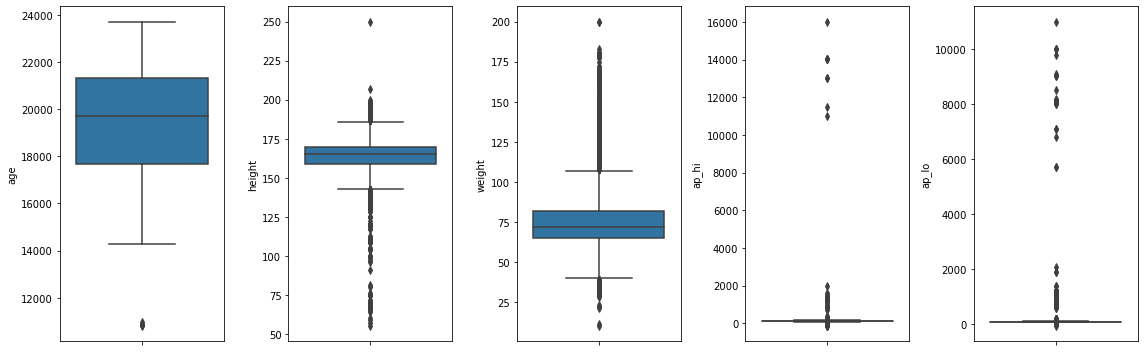

In [8]:
#Identification of Outliers

fig, axes = plt.subplots(1, 5, figsize=(16, 5))
sns.boxplot(data=df, y='age', ax=axes[0])
sns.boxplot(data=df, y='height', ax=axes[1])
sns.boxplot(data=df, y='weight', ax=axes[2])
sns.boxplot(data=df, y='ap_hi', ax=axes[3])
sns.boxplot(data=df, y='ap_lo', ax=axes[4])
plt.tight_layout()

In [9]:
#Adding Indications

num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in num_cols:
    high_q = df[col].quantile(0.95)
    low_q = df[col].quantile(0.05)
    
    df['{}_outlier'.format(col)] = np.where((df[col] > high_q) | (df[col] < low_q), 1, 0)
    df['{}_outlier'.format(col)] = df['{}_outlier'.format(col)].astype('category')
    

In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_outlier,height_outlier,weight_outlier,ap_hi_outlier,ap_lo_outlier
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,0,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0,1


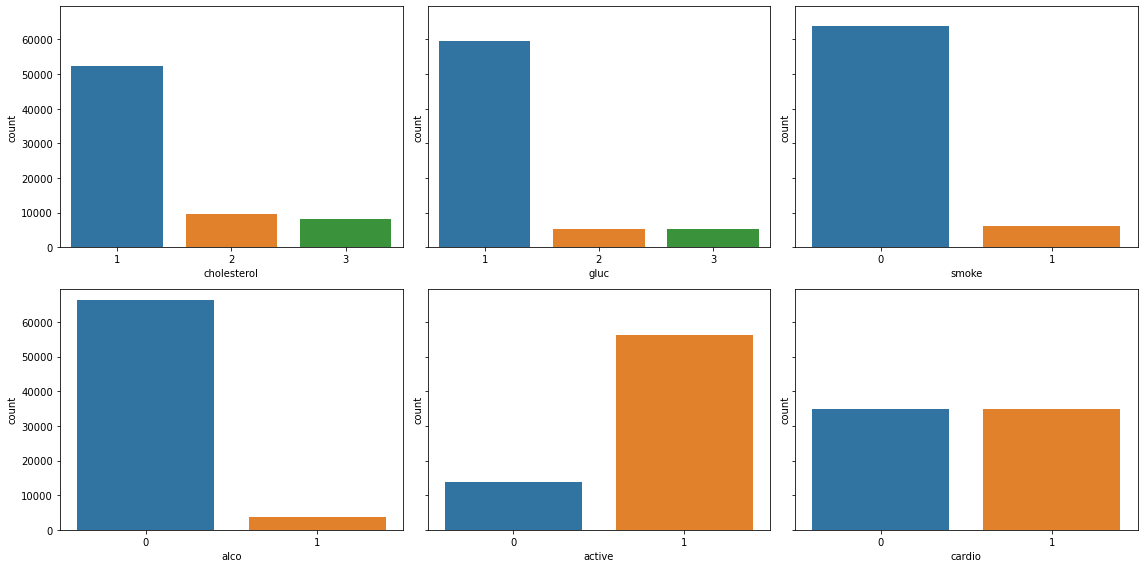

In [11]:
#Identifing Outliers in Categorical

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
sns.countplot(data=df, x='cholesterol', ax=axes[0, 0])
sns.countplot(data=df, x='gluc', ax=axes[0, 1])
sns.countplot(data=df, x='smoke', ax=axes[0, 2])
sns.countplot(data=df, x='alco', ax=axes[1, 0])
sns.countplot(data=df, x='active', ax=axes[1, 1])
sns.countplot(data=df, x='cardio', ax=axes[1, 2])
plt.tight_layout()

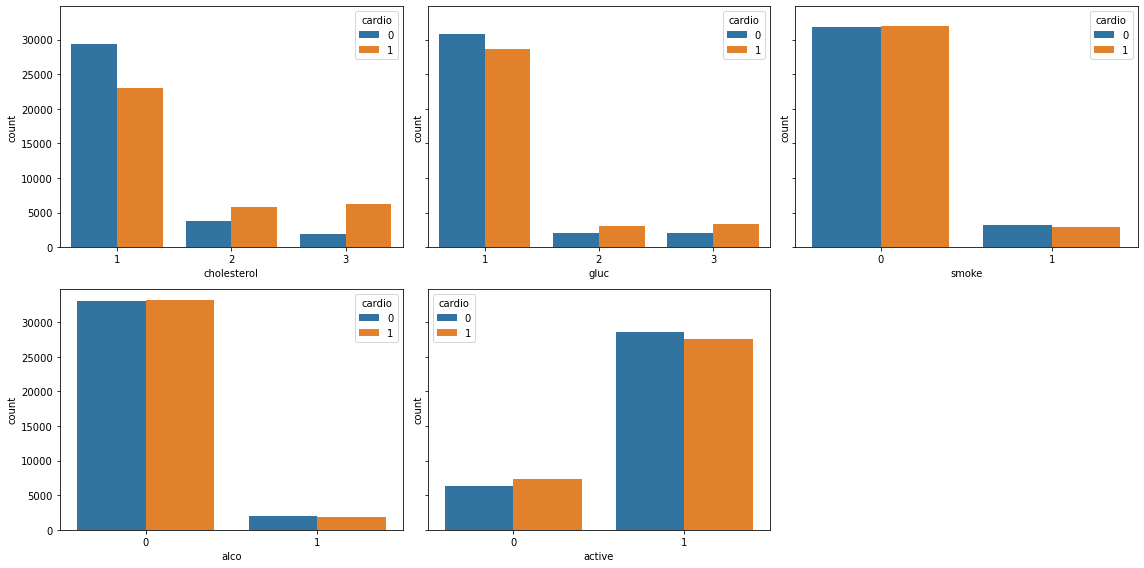

In [12]:
#distribution of the target feature by categorical features


fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
sns.countplot(data=df, x='cholesterol', hue='cardio', ax=axes[0, 0])
sns.countplot(data=df, x='gluc', hue='cardio', ax=axes[0, 1])
sns.countplot(data=df, x='smoke', hue='cardio', ax=axes[0, 2])
sns.countplot(data=df, x='alco', hue='cardio', ax=axes[1, 0])
sns.countplot(data=df, x='active', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1, 2])

plt.tight_layout()

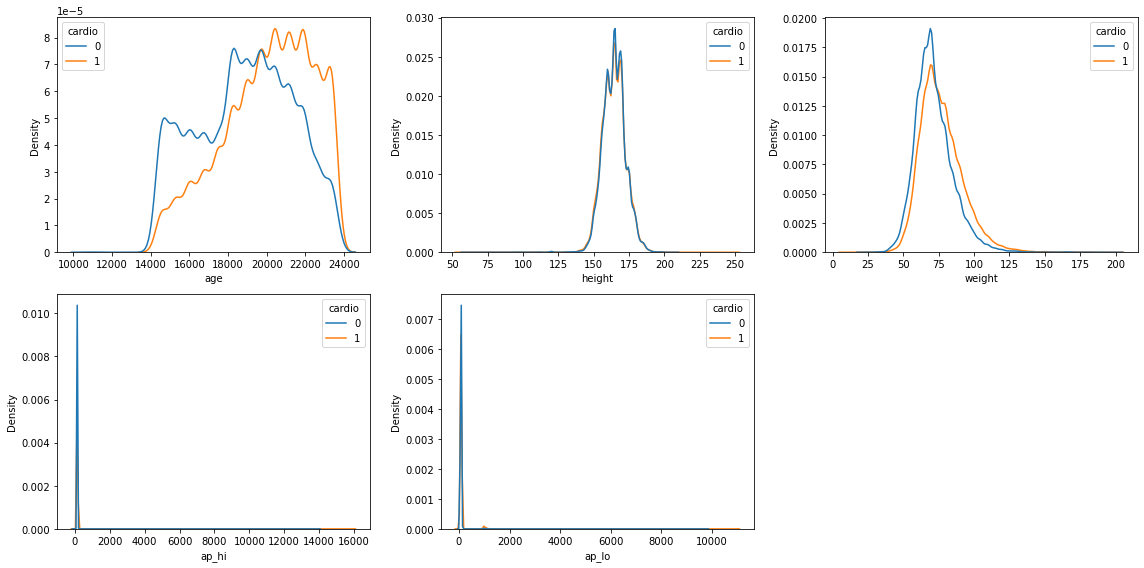

In [13]:
#distribution of the target variable on quantitative features

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.kdeplot(data=df, x='age', hue='cardio', ax=axes[0, 0])
sns.kdeplot(data=df, x='height', hue='cardio', ax=axes[0, 1])
sns.kdeplot(data=df, x='weight', hue='cardio', ax=axes[0, 2])
sns.kdeplot(data=df, x='ap_hi', hue='cardio', ax=axes[1, 0])
sns.kdeplot(data=df, x='ap_lo', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1, 2])

plt.tight_layout()

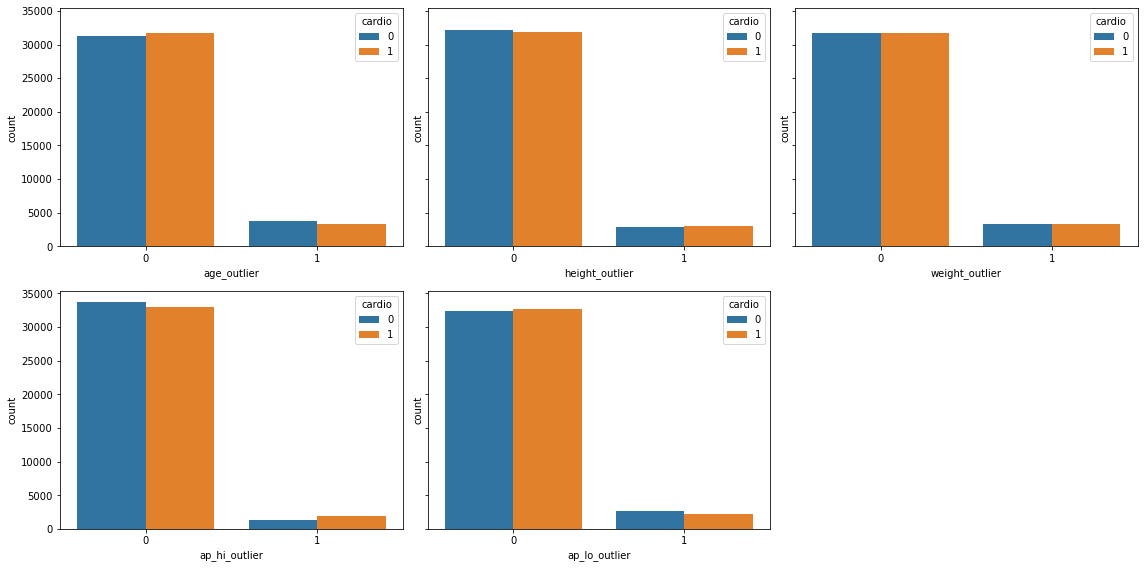

In [14]:
#search for distributions of a target trait by identifiers of outliers of quantitative traits

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
sns.countplot(data=df, x='age_outlier', hue='cardio', ax=axes[0, 0])
sns.countplot(data=df, x='height_outlier', hue='cardio', ax=axes[0, 1])
sns.countplot(data=df, x='weight_outlier', hue='cardio', ax=axes[0, 2])
sns.countplot(data=df, x='ap_hi_outlier', hue='cardio', ax=axes[1, 0])
sns.countplot(data=df, x='ap_lo_outlier', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1, 2])

plt.tight_layout()

<AxesSubplot:xlabel='ap_hi', ylabel='Density'>

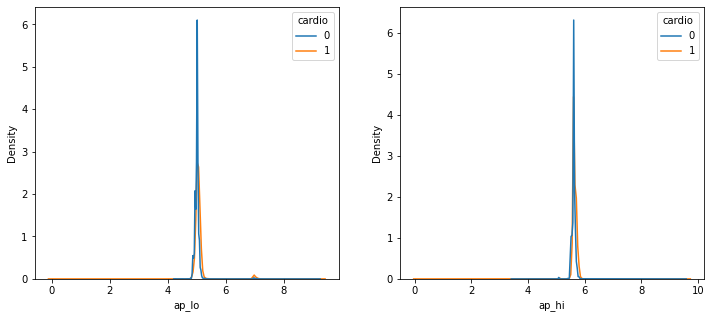

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(x=np.log(df['ap_lo']+abs(df['ap_lo'].min()) + 1), hue=df['cardio'], ax=axes[0])
sns.kdeplot(x=np.log(df['ap_hi']+abs(df['ap_hi'].min()) + 1), hue=df['cardio'], ax=axes[1])

In [16]:
df['ap_lo'] = df['ap_lo']+abs(df['ap_lo']) + 1
df['ap_hi'] = df['ap_hi']+abs(df['ap_hi']) + 1

# Modeling

In [17]:

#split the dataset into training features and a target variable
x = df.drop('cardio', axis=1)
y = df['cardio']

#choose categorical and numerical features
cat_cols = x.select_dtypes(include=['category']).columns
num_cols = x.select_dtypes(exclude=['category']).columns

In [18]:
#feature converter

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_pipe = OneHotEncoder(drop='first')
num_pipe = StandardScaler()

col_trans = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

In [20]:
clf = make_pipeline(col_trans, KNeighborsClassifier())

cvs_res = cross_val_score(clf, x, y)
print('Average Cross Validation Accuracy: {:.2%} +/-{:.2%}'.format(cvs_res.mean(), cvs_res.std()))

Average Cross Validation Accuracy: 64.78% +/-0.68%


In [21]:

#divide the data set into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [22]:
#make predictions
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

In [23]:
#classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65     10506
           1       0.65      0.62      0.63     10494

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



In [24]:
#roc_auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.6425577608351871